In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [2]:
# 정규화 함수
from sklearn.preprocessing import MinMaxScaler, StandardScaler



import pandas as pd
import numpy as np

def normalize_by_first(input_df, first_values=None):
    # first_values가 제공되지 않은 경우
    if first_values is None:
        first_values = pd.DataFrame(columns=input_df.columns)
        
        for column in input_df.columns:
            first_value = input_df[column].iloc[0]
            
            # 첫 번째 값이 0인 경우 0이 아닌 값을 찾기
            if first_value == 0:
                for i in range(len(input_df[column])):
                    if input_df[column].iloc[i] != 0:
                        first_value = input_df[column].iloc[i]
                        break
            
            # first_values에 첫 번째 값 추가
            first_values.at[0, column] = first_value
    
    # 각 열을 first_values에 해당하는 값으로 나누기
    for column in input_df.columns:
        value = first_values.at[0, column]
        if value == 0:
            input_df[column] = 0  # 0으로 나누지 않도록 0으로 설정
        else:
            input_df[column] = input_df[column] / value
    
    # NaN 값 처리
    input_df = input_df.apply(pd.to_numeric, errors='coerce')
    input_df = input_df.fillna(0)  # NaN 값이 있을 경우 0으로 대체
    
    return input_df, first_values



def apply_min_max_scaling_columnwise(input_df):
    # 빈 데이터프레임 생성 (결과 저장용)
    scaled_df = pd.DataFrame()

    # 각 열에 대해 MinMaxScaler를 적용
    for column in input_df.columns:
        scaler = MinMaxScaler()  # 각 열마다 새로운 스케일러 객체 생성
        scaled_values = scaler.fit_transform(input_df[[column]])  # 각 열에 대해 스케일링 수행
        
        # 스케일링된 값을 결과 데이터프레임에 추가
        scaled_df[column] = scaled_values.flatten()  # 배열을 1차원으로 변환하여 추가

    return scaled_df





In [3]:
import pandas as pd
import re
import numpy as np

# CSV 파일 전체를 읽어옴 (skiprows 사용하지 않음)
csv = pd.read_csv(r"C:\Users\poip8\Desktop\code\WP project before summer24\csv\1차데이터\excluded+GT2_filtered_추출 데이터 TAG(샘플).csv")
csv=csv.fillna(0)
# 원본 target_col 추출 (26826번째 행부터 86826번째 행까지)
target_col = csv.iloc[26826:86826 + 1, 83]
print(target_col.iloc[0])

# 필요한 범위의 데이터만 선택
csv_selec = csv.iloc[26826:86826 + 1].reset_index(drop=True)
scaler=StandardScaler()
# 스케일링 적용


# 민감도 분석 결과에서 열 번호 추출
col_to_ex = pd.read_csv(r"C:\Users\poip8\Desktop\code\WP project before summer24\csv\민감도\LSTM_0인 값 추출한 변수.csv", encoding='cp949')

numbers = []

for i in range(30):
    text = col_to_ex.iloc[i, 6]
    num_temp = re.findall(r'\d+', text)
    if num_temp:
        last_num = int(num_temp[-1])
        numbers.append(last_num)

print(numbers)
numbers.append(84)
numbers = np.subtract(numbers, 1)
print(numbers)

selected_col = csv_selec.iloc[:, numbers]
scaled_columns = pd.DataFrame()
scalers={}

for col in selected_col.columns:
    # 각 열에 대해 MinMaxScaler를 적용하고 데이터프레임에 추가
    scaled_col = scaler.fit_transform(selected_col[[col]])
    scaled_columns[col] = scaled_col.flatten()
    scalers[col] = scaler

# 스케일링된 데이터프레임 확인
print(scaled_columns.head())








c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\IPython\core\interactiveshell.py:3577: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


57.02
[128, 3, 69, 70, 4, 2, 114, 102, 172, 93, 50, 12, 124, 86, 76, 22, 68, 31, 163, 161, 73, 17, 67, 63, 142, 126, 120, 145, 65, 97]
[127   2  68  69   3   1 113 101 171  92  49  11 123  85  75  21  67  30
 162 160  72  16  66  62 141 125 119 144  64  96  83]
       B128        B3       B69       B70        B4        B2      B114  \
0  7.812930  9.531198 -0.637258  3.660064 -0.331891 -5.392869 -0.941636   
1  7.249652  9.125111 -0.613148  3.660064 -0.263516 -5.396769 -0.941636   
2  7.249652  8.248819 -0.597075  3.660064 -0.140442 -5.356463 -0.971725   
3  7.249652  7.372527 -0.572966  3.660064 -0.126767 -5.377266 -0.991784   
4  7.249652  6.838202 -0.548856  3.652673 -0.113092 -5.305755 -0.991784   

       B102      B172       B93  ...       B17       B67       B63  B142  \
0 -3.772408 -4.593894 -0.632213  ... -3.849452 -7.892861 -1.252220   0.0   
1 -3.719994 -4.603231 -0.632213  ... -3.842141 -7.880444 -1.264087   0.0   
2 -3.676316 -4.612568 -0.632213  ... -3.833611 -7.868028 -1

In [4]:
print(scaled_columns)
print(target_col)

           B128        B3       B69       B70        B4        B2      B114  \
0      7.812930  9.531198 -0.637258  3.660064 -0.331891 -5.392869 -0.941636   
1      7.249652  9.125111 -0.613148  3.660064 -0.263516 -5.396769 -0.941636   
2      7.249652  8.248819 -0.597075  3.660064 -0.140442 -5.356463 -0.971725   
3      7.249652  7.372527 -0.572966  3.660064 -0.126767 -5.377266 -0.991784   
4      7.249652  6.838202 -0.548856  3.652673 -0.113092 -5.305755 -0.991784   
...         ...       ...       ...       ...       ...       ...       ...   
59996 -0.072962  0.212579  0.319086  0.555999 -0.154117 -0.907132 -0.099147   
59997 -0.072962  0.191206  0.335159  0.570780 -0.140442 -0.905832 -0.079088   
59998 -0.072962  0.169833  0.351232  0.563389 -0.140442 -0.966942 -0.079088   
59999 -0.072962  0.169833  0.335159  0.519046 -0.154117 -0.977344 -0.089117   
60000 -0.072962  0.191206  0.238721  0.496874 -0.072068 -0.907132 -0.089117   

           B102      B172       B93  ...       B17 

In [5]:
import torch
# selected_col=apply_min_max_scaling_columnwise(selected_col) #타겟 노드는 스케일 에서 제외해야함
print(type(scaled_columns))
print("input features:", scaled_columns)
node_feature_tensor_train = torch.tensor(scaled_columns.values, dtype=torch.float32)  ###마지막 열이 84열이기 때문에 마지막 노드가 타겟 노드가 됨
# target_col의 데이터 타입을 확인하고 숫자형으로 변환
target_col = pd.to_numeric(target_col, errors='coerce')

# numpy 배열로 변환 후 tensor로 변환
target_col = torch.tensor(target_col.values, dtype=torch.float32)
print(node_feature_tensor_train.shape)

num_nodes=node_feature_tensor_train.shape[1]

print(target_col)




<class 'pandas.core.frame.DataFrame'>
input features:            B128        B3       B69       B70        B4        B2      B114  \
0      7.812930  9.531198 -0.637258  3.660064 -0.331891 -5.392869 -0.941636   
1      7.249652  9.125111 -0.613148  3.660064 -0.263516 -5.396769 -0.941636   
2      7.249652  8.248819 -0.597075  3.660064 -0.140442 -5.356463 -0.971725   
3      7.249652  7.372527 -0.572966  3.660064 -0.126767 -5.377266 -0.991784   
4      7.249652  6.838202 -0.548856  3.652673 -0.113092 -5.305755 -0.991784   
...         ...       ...       ...       ...       ...       ...       ...   
59996 -0.072962  0.212579  0.319086  0.555999 -0.154117 -0.907132 -0.099147   
59997 -0.072962  0.191206  0.335159  0.570780 -0.140442 -0.905832 -0.079088   
59998 -0.072962  0.169833  0.351232  0.563389 -0.140442 -0.966942 -0.079088   
59999 -0.072962  0.169833  0.335159  0.519046 -0.154117 -0.977344 -0.089117   
60000 -0.072962  0.191206  0.238721  0.496874 -0.072068 -0.907132 -0.089117  

In [6]:
import random


import torch

def node_select(node_num): 
    edge_source = []
    edge_targets = []
    
    # 마지막 노드를 타겟 노드로 간주하고, 나머지 모든 노드를 이 노드와 연결
    target_node = node_num - 1
    
    for i in range(node_num - 1):  # 마지막 노드를 제외한 모든 노드와 연결
        edge_source.append(i)
        edge_targets.append(target_node)
    
    # 마지막 노드와 자기 자신을 연결
    edge_source.append(target_node)
    edge_targets.append(target_node)
    
    # edge_index 텐서로 변환 (2D 텐서: [2, 엣지 개수])
    edge_index = torch.tensor([edge_source, edge_targets], dtype=torch.long)
    
    # edge_index 값이 유효한지 검사
    # print("edge_index:", edge_index)
    if edge_index.min().item() < 0 or edge_index.max().item() >= node_num:
        raise ValueError(f"Invalid edge_index detected: {edge_index}")
    
    return edge_index



    
    
##노드 정렬해서 index 랑 학습데이터 매칭 명시
# 타겟 노드 별도 관리
# 엣지 인덱스 생성함수 생성
# 노드 번호 관리 ###   

In [7]:
def random_connect_nodes(node_num, min_connections=1):
    edge_source = []
    edge_targets = []

    for i in range(node_num):
        num_connections = random.randint(min_connections, node_num)  # 최소 1개에서 최대 node_num개의 연결
        connected_nodes = random.sample(range(node_num), num_connections)

        for target_node in connected_nodes:
            edge_source.append(i)
            edge_targets.append(target_node)

    # edge_index 텐서로 변환 (2D 텐서: [2, 엣지 개수])
    edge_index = torch.tensor([edge_source, edge_targets], dtype=torch.long)

    # edge_index 값이 유효한지 검사
    if edge_index.min().item() < 0 or edge_index.max().item() >= node_num:
        raise ValueError(f"Invalid edge_index detected: {edge_index}")

    return edge_index

In [8]:
def fully_connect_nodes(node_num):
    edge_source = []
    edge_targets = []

    for i in range(node_num):
        for j in range(node_num):
            edge_source.append(i)
            edge_targets.append(j)

    # edge_index 텐서로 변환 (2D 텐서: [2, 엣지 개수])
    edge_index = torch.tensor([edge_source, edge_targets], dtype=torch.long)

    # edge_index 값이 유효한지 검사
    if edge_index.min().item() < 0 or edge_index.max().item() >= node_num:
        raise ValueError(f"Invalid edge_index detected: {edge_index}")

    return edge_index

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
         30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]])
torch.Size([2, 31])


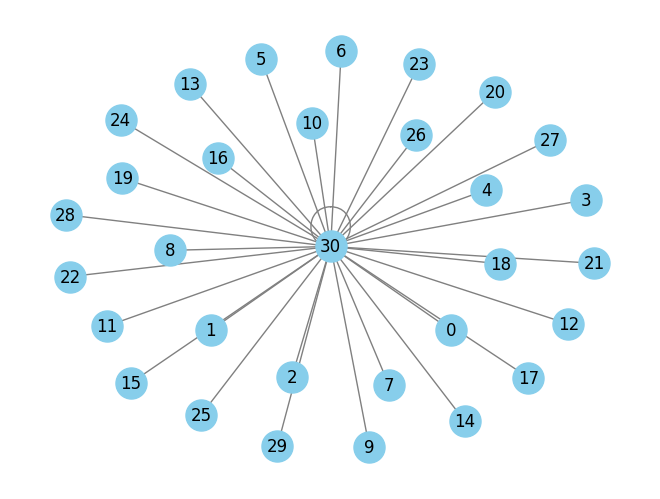

In [9]:
edge_index = node_select( node_num=31)
print(edge_index)

print(edge_index.shape)

import networkx as nx
import matplotlib.pyplot as plt
import torch

def visualize_graph(edge_index):
    # NetworkX 그래프 객체 생성
    G = nx.Graph()
    
    # 엣지 정보 추가
    edges = edge_index.t().tolist()  # [2, num_edges] 텐서를 [num_edges, 2] 리스트로 변환
    G.add_edges_from(edges)
    
    # 그래프 그리기 (고립된 노드를 포함하지 않음)
    pos = nx.spring_layout(G)  # 노드 위치를 자동으로 정렬
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
    plt.show()

# 예시 사용
# edge_index, isol = node_select(ex_num=10, node_num=31)
visualize_graph(edge_index)


In [10]:
import torch_geometric
from torch_geometric.data import Data
from torch_geometric.loader import dataloader


def sliding_window(tensor, y_tensor, window_size, step):
    _, length = tensor.shape
    length_2 = len(y_tensor)
    
    if length != length_2:
        print("Error: tensor length mismatch")
        return None
    else:
        num_windows = (length - window_size) // step + 1
        windows = []
        target_windows = []
        for i in range(num_windows):
            window = tensor[:, i*step:i*step + window_size]
            target_value = y_tensor[i*step + window_size - 1]  # 각 윈도우의 마지막 값만 선택
            windows.append(window)
            target_windows.append(target_value.unsqueeze(0))
            
    return windows, target_windows

# _,length=node_feature_tensor_train.shape
# train_window,y_window=sliding_window(node_feature_tensor_train.t(), target_col,20,1)
# # print(train_window)
# # print(y_window)
# print(f"Number of windows: {len(train_window)}")
# print(f"Shape of each window: {train_window[0].shape}")
# print(f"Shape of target: {y_window[0].shape}")
# train_graph=[Data(x=train_window[i],y=y_window[i],edge_index=edge_index) for i in range(len(train_window))]           #ragne 안에 lenght 값이 잘못된 값이어서 30개만 되는것. ㅇㅋ?

# for i, data in range(5):
#     print(f"Data {i} y value:")
#     print(data.y)





In [11]:
from torch_geometric.data import Dataset, Data
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
import torch

class MyDataset(Dataset):
    def __init__(self, data_list, transform=None):
        super().__init__(transform=transform)
        self.data_list = data_list

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

    def index_select(self, indices):
        selected_data = [self.data_list[i] for i in indices]
        return MyDataset(selected_data)
    
    def print_summary(self):
        num_graphs = len(self.data_list)
        num_nodes = [data.x.size(0) for data in self.data_list]
        num_edges = [data.edge_index.size(1) for data in self.data_list]
        num_features = self.data_list[0].x.size(1) if num_graphs > 0 else 0
        num_classes = len(set([data.y.item() for data in self.data_list]))

        print(f"MyDataset (#graphs={num_graphs}):")
        print("+------------+----------+----------+")
        print("|            |   #nodes |   #edges |")
        print("+------------+----------+----------+")
        print(f"| mean       | {sum(num_nodes) / num_graphs:.2f} | {sum(num_edges) / num_graphs:.2f} |")
        print(f"| std        | {torch.std(torch.tensor(num_nodes, dtype=torch.float32)):.2f} | {torch.std(torch.tensor(num_edges, dtype=torch.float32)):.2f} |")
        print(f"| min        | {min(num_nodes)} | {min(num_edges)} |")
        print(f"| quantile25 | {torch.quantile(torch.tensor(num_nodes, dtype=torch.float32), 0.25):.2f} | {torch.quantile(torch.tensor(num_edges, dtype=torch.float32), 0.25):.2f} |")
        print(f"| median     | {torch.median(torch.tensor(num_nodes, dtype=torch.float32)):.2f} | {torch.median(torch.tensor(num_edges, dtype=torch.float32)):.2f} |")
        print(f"| quantile75 | {torch.quantile(torch.tensor(num_nodes, dtype=torch.float32), 0.75):.2f} | {torch.quantile(torch.tensor(num_edges, dtype=torch.float32), 0.75):.2f} |")
        print(f"| max        | {max(num_nodes)} | {max(num_edges)} |")
        print("+------------+----------+----------+")


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class GAT_LSTM(torch.nn.Module):
    def __init__(self, in_channels, out_channels, lstm_hidden_size, lstm_num_layers, heads, dropout_rate):
        super(GAT_LSTM, self).__init__()
        
        # GAT Layer
        self.gat = GATConv(in_channels=in_channels, out_channels=out_channels, heads=heads, concat=False, add_self_loops=False)
        
        # LSTM Layer
        self.lstm = nn.LSTM(
            input_size=out_channels,
            hidden_size=lstm_hidden_size,
            num_layers=lstm_num_layers,
            bias=True,
            batch_first=True,
        )
        
        # Dropout Layer
        self.dropout = nn.Dropout(dropout_rate)
        
        # Fully Connected Layer for output
        self.fc1 = nn.Linear(lstm_hidden_size, 20)  # 이전 Dense(30, activation='relu')에 해당
        self.fc2 = nn.Linear(20, 1)  # 마지막 Dense(1, activation='linear')에 해당

    def forward(self, x, edge_index, batch):
        # GAT을 통해 피처 변환 및 attention 계수 계산
        device = x.device
        out, attention_weights = self.gat(x, edge_index, return_attention_weights=True)

        # 배치에서 그래프 수와 노드 수 계산
        batch_size = batch.max().item() + 1
        num_nodes_per_graph = x.size(0) // batch_size

        
        # LSTM 입력을 위해 배치 크기와 시퀀스 길이를 설정
        attention_applied = out.view(batch_size, num_nodes_per_graph, -1)

        # LSTM 통과
        lstm_out, (hn, cn) = self.lstm(attention_applied)
        lstm_out = F.relu(lstm_out)

        # Dropout 적용
        lstm_out = self.dropout(lstm_out)
        
        # Fully Connected Layer 통과
        final_out = self.fc1(lstm_out[:, -1, :])  # 마지막 시퀀스만 추출하고 Dense(30, activation='relu') 적용
        final_out = F.relu(final_out)
        final_out = self.fc2(final_out)  # Dense(1, activation='linear') 적용
        
        return final_out


In [13]:
test_time_series_data = csv.iloc[209985:255774, :].reset_index(drop=True)


scaled_test_cols = pd.DataFrame()




# 테스트 데이터 전처리
test_time_series_data = test_time_series_data.fillna(0)



test_target_col = csv.iloc[209985:255774, 83]



test_selected_col = test_time_series_data.iloc[:, numbers]  # 'numbers'는 사전에 정의되어 있어야 합니다.
test_selected_col = test_selected_col[selected_col.columns]

scaled_test_cols = pd.DataFrame()

for col in test_selected_col.columns:
    scaler = StandardScaler()  # 각 열마다 새로운 스케일러 객체 생성
    scaler.fit(selected_col[[col]])  # 학습 데이터에 대해 fit
    scaled_cols = scaler.transform(test_selected_col[[col]])  # 테스트 데이터에 대해 transform
    scaled_test_cols[col] = scaled_cols.flatten()  # 1차원으로 평탄화하여 저장



# 테스트 데이터 텐서로 변환
test_node_feature_tensor = torch.tensor(scaled_test_cols.values, dtype=torch.float32)
test_target_col = pd.to_numeric(test_target_col, errors='coerce').fillna(0)
# .values로 numpy 배열로 변환한 다음 tensor로 변환
test_target_tensor = torch.tensor(test_target_col.values, dtype=torch.float32)

print(test_node_feature_tensor.shape)
print(test_target_tensor.shape)

torch.Size([45789, 31])
torch.Size([45789])


In [14]:
import torch
import gc

def clear_memory():
    # GPU 메모리 정리
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.synchronize()

    # CPU 메모리 정리
    gc.collect()

Results will be saved in: ./results_20240826_190733
Training with window_size=10, step_size=1


c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 338.6419, Val Loss: 1.6069
Epoch [2/200] - Train Loss: 35.1356, Val Loss: 2.1490
Epoch [3/200] - Train Loss: 32.5594, Val Loss: 2.3768
Epoch [4/200] - Train Loss: 29.0687, Val Loss: 1.2225
Epoch [5/200] - Train Loss: 23.6537, Val Loss: 1.9121
Epoch [6/200] - Train Loss: 18.4588, Val Loss: 1.6820
Epoch [7/200] - Train Loss: 12.9428, Val Loss: 1.9249
Epoch [8/200] - Train Loss: 8.6779, Val Loss: 1.8565
Epoch [9/200] - Train Loss: 5.5775, Val Loss: 1.2323
Epoch [10/200] - Train Loss: 3.7928, Val Loss: 0.9821
Epoch [11/200] - Train Loss: 2.7560, Val Loss: 0.9266
Epoch [12/200] - Train Loss: 2.3272, Val Loss: 0.7081
Epoch [13/200] - Train Loss: 2.1805, Val Loss: 0.6949
Epoch [14/200] - Train Loss: 2.3192, Val Loss: 0.7447
Epoch [15/200] - Train Loss: 2.1271, Val Loss: 0.9775
Epoch [16/200] - Train Loss: 2.1409, Val Loss: 0.9913
Epoch [17/200] - Train Loss: 2.1596, Val Loss: 1.0509
Epoch [18/200] - Train Loss: 1.9684, Val Loss: 0.8602
Epoch [19/200] - Train Loss: 

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/200] - Train Loss: 1439.8201, Val Loss: 37.8515
Epoch [2/200] - Train Loss: 50.5690, Val Loss: 0.2584
Epoch [3/200] - Train Loss: 42.0225, Val Loss: 0.4138
Epoch [4/200] - Train Loss: 40.2847, Val Loss: 0.7510
Epoch [5/200] - Train Loss: 40.0049, Val Loss: 0.9910
Epoch [6/200] - Train Loss: 40.5773, Val Loss: 1.5165
Epoch [7/200] - Train Loss: 38.0666, Val Loss: 1.8025
Epoch [8/200] - Train Loss: 37.1003, Val Loss: 1.2261
Epoch [9/200] - Train Loss: 36.3282, Val Loss: 0.9369
Epoch [10/200] - Train Loss: 35.5958, Val Loss: 0.7761
Epoch [11/200] - Train Loss: 35.4414, Val Loss: 0.5912
Epoch [12/200] - Train Loss: 34.9399, Val Loss: 0.5584
Epoch [13/200] - Train Loss: 34.8421, Val Loss: 1.3016
Epoch [14/200] - Train Loss: 32.9740, Val Loss: 2.5215
Epoch [15/200] - Train Loss: 32.6744, Val Loss: 0.9574
Epoch [16/200] - Train Loss: 30.9898, Val Loss: 1.8174
Epoch [17/200] - Train Loss: 30.1773, Val Loss: 1.7244
Epoch [18/200] - Train Loss: 29.1106, Val Loss: 1.9405
Epoch [19/200] -

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/200] - Train Loss: 2260.7094, Val Loss: 1092.3924
Epoch [2/200] - Train Loss: 527.8698, Val Loss: 28.7333
Epoch [3/200] - Train Loss: 56.4657, Val Loss: 0.8865
Epoch [4/200] - Train Loss: 41.6002, Val Loss: 1.0877
Epoch [5/200] - Train Loss: 41.9065, Val Loss: 0.6462
Epoch [6/200] - Train Loss: 41.2902, Val Loss: 0.7233
Epoch [7/200] - Train Loss: 41.1592, Val Loss: 0.5233
Epoch [8/200] - Train Loss: 41.2462, Val Loss: 0.4372
Epoch [9/200] - Train Loss: 40.1348, Val Loss: 0.2839
Epoch [10/200] - Train Loss: 41.9493, Val Loss: 0.2822
Epoch [11/200] - Train Loss: 41.3845, Val Loss: 6.5678
Epoch [12/200] - Train Loss: 40.0000, Val Loss: 0.6018
Epoch [13/200] - Train Loss: 34.3493, Val Loss: 1.6791
Epoch [14/200] - Train Loss: 37.2319, Val Loss: 0.9276
Epoch [15/200] - Train Loss: 35.1693, Val Loss: 0.4269
Epoch [16/200] - Train Loss: 36.5339, Val Loss: 1.3874
Epoch [17/200] - Train Loss: 36.9978, Val Loss: 1.9879
Epoch [18/200] - Train Loss: 36.3169, Val Loss: 1.2810
Epoch [19/20

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([21])) that is different to the input size (torch.Size([21, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([30])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 292.9652, Val Loss: 4.1379
Epoch [2/200] - Train Loss: 36.0603, Val Loss: 1.9735
Epoch [3/200] - Train Loss: 32.5027, Val Loss: 1.6540
Epoch [4/200] - Train Loss: 29.6111, Val Loss: 0.6708
Epoch [5/200] - Train Loss: 25.6262, Val Loss: 2.6095
Epoch [6/200] - Train Loss: 21.8049, Val Loss: 2.4982
Epoch [7/200] - Train Loss: 17.2959, Val Loss: 1.0433
Epoch [8/200] - Train Loss: 13.0794, Val Loss: 0.9125
Epoch [9/200] - Train Loss: 9.1909, Val Loss: 0.9082
Epoch [10/200] - Train Loss: 6.5175, Val Loss: 0.8736
Epoch [11/200] - Train Loss: 4.7122, Val Loss: 0.8249
Epoch [12/200] - Train Loss: 3.7724, Val Loss: 0.7361
Epoch [13/200] - Train Loss: 3.3521, Val Loss: 0.7049
Epoch [14/200] - Train Loss: 3.1620, Val Loss: 0.9007
Epoch [15/200] - Train Loss: 2.8847, Val Loss: 1.2700
Epoch [16/200] - Train Loss: 2.9221, Val Loss: 0.6968
Epoch [17/200] - Train Loss: 2.7409, Val Loss: 0.6813
Epoch [18/200] - Train Loss: 3.1849, Val Loss: 0.7164
Epoch [19/200] - Train Loss:

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([30])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/200] - Train Loss: 1225.1212, Val Loss: 1.7907
Epoch [2/200] - Train Loss: 43.2924, Val Loss: 0.7918
Epoch [3/200] - Train Loss: 41.8557, Val Loss: 0.9152
Epoch [4/200] - Train Loss: 40.7736, Val Loss: 1.8332
Epoch [5/200] - Train Loss: 38.6334, Val Loss: 1.2423
Epoch [6/200] - Train Loss: 37.7335, Val Loss: 1.5786
Epoch [7/200] - Train Loss: 36.5876, Val Loss: 1.8772
Epoch [8/200] - Train Loss: 36.3042, Val Loss: 2.7539
Epoch [9/200] - Train Loss: 34.5312, Val Loss: 1.1330
Epoch [10/200] - Train Loss: 36.1241, Val Loss: 1.4263
Epoch [11/200] - Train Loss: 34.6094, Val Loss: 1.9017
Epoch [12/200] - Train Loss: 34.0988, Val Loss: 1.3632
Epoch [13/200] - Train Loss: 33.0826, Val Loss: 2.2252
Epoch [14/200] - Train Loss: 32.1853, Val Loss: 1.8022
Epoch [15/200] - Train Loss: 31.0883, Val Loss: 0.9603
Epoch [16/200] - Train Loss: 30.6619, Val Loss: 2.0451
Epoch [17/200] - Train Loss: 29.5681, Val Loss: 3.0105
Epoch [18/200] - Train Loss: 28.7428, Val Loss: 4.2019
Epoch [19/200] - 

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 2100.9342, Val Loss: 750.7755
Epoch [2/200] - Train Loss: 282.3434, Val Loss: 0.2746
Epoch [3/200] - Train Loss: 44.7515, Val Loss: 0.7573
Epoch [4/200] - Train Loss: 41.7686, Val Loss: 0.3498
Epoch [5/200] - Train Loss: 43.4220, Val Loss: 0.2399
Epoch [6/200] - Train Loss: 42.6725, Val Loss: 0.2973
Epoch [7/200] - Train Loss: 42.2854, Val Loss: 0.3160
Epoch [8/200] - Train Loss: 41.6469, Val Loss: 1.3590
Epoch [9/200] - Train Loss: 37.5749, Val Loss: 0.9663
Epoch [10/200] - Train Loss: 39.8462, Val Loss: 0.6608
Epoch [11/200] - Train Loss: 37.8333, Val Loss: 0.4747
Epoch [12/200] - Train Loss: 38.4550, Val Loss: 0.6513
Epoch [13/200] - Train Loss: 36.7806, Val Loss: 1.3272
Epoch [14/200] - Train Loss: 37.6848, Val Loss: 1.2663
Epoch [15/200] - Train Loss: 37.0512, Val Loss: 0.5159
Epoch [16/200] - Train Loss: 36.8180, Val Loss: 1.3075
Epoch [17/200] - Train Loss: 34.9077, Val Loss: 1.5043
Epoch [18/200] - Train Loss: 36.5522, Val Loss: 0.6917
Epoch [19/200]

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([17])) that is different to the input size (torch.Size([17, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([29])) that is different to the input size (torch.Size([29, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 281.6491, Val Loss: 1.5598
Epoch [2/200] - Train Loss: 30.3138, Val Loss: 1.8153
Epoch [3/200] - Train Loss: 29.0360, Val Loss: 1.6540
Epoch [4/200] - Train Loss: 27.2485, Val Loss: 0.6507
Epoch [5/200] - Train Loss: 24.5955, Val Loss: 2.5786
Epoch [6/200] - Train Loss: 22.6388, Val Loss: 1.4143
Epoch [7/200] - Train Loss: 20.0965, Val Loss: 0.7501
Epoch [8/200] - Train Loss: 17.6225, Val Loss: 0.6102
Epoch [9/200] - Train Loss: 14.6259, Val Loss: 1.0060
Epoch [10/200] - Train Loss: 12.1655, Val Loss: 0.9380
Epoch [11/200] - Train Loss: 9.4657, Val Loss: 0.6620
Epoch [12/200] - Train Loss: 7.2533, Val Loss: 0.5370
Epoch [13/200] - Train Loss: 5.6484, Val Loss: 0.5519
Epoch [14/200] - Train Loss: 4.6834, Val Loss: 0.4982
Epoch [15/200] - Train Loss: 3.8630, Val Loss: 0.5740
Epoch [16/200] - Train Loss: 3.4734, Val Loss: 0.6263
Epoch [17/200] - Train Loss: 3.1625, Val Loss: 0.5895
Epoch [18/200] - Train Loss: 2.9115, Val Loss: 0.8757
Epoch [19/200] - Train Los

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([29])) that is different to the input size (torch.Size([29, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/200] - Train Loss: 1180.5812, Val Loss: 1.7808
Epoch [2/200] - Train Loss: 37.3980, Val Loss: 0.6662
Epoch [3/200] - Train Loss: 37.4689, Val Loss: 0.5896
Epoch [4/200] - Train Loss: 35.2869, Val Loss: 3.2687
Epoch [5/200] - Train Loss: 33.8895, Val Loss: 2.3732
Epoch [6/200] - Train Loss: 32.5913, Val Loss: 0.9934
Epoch [7/200] - Train Loss: 31.9098, Val Loss: 0.4558
Epoch [8/200] - Train Loss: 30.9233, Val Loss: 2.4451
Epoch [9/200] - Train Loss: 30.8392, Val Loss: 1.1275
Epoch [10/200] - Train Loss: 30.4676, Val Loss: 1.7509
Epoch [11/200] - Train Loss: 30.5576, Val Loss: 0.4791
Epoch [12/200] - Train Loss: 30.1815, Val Loss: 1.2808
Epoch [13/200] - Train Loss: 31.1255, Val Loss: 2.0894
Epoch [14/200] - Train Loss: 30.1726, Val Loss: 2.3376
Epoch [15/200] - Train Loss: 28.9291, Val Loss: 1.5288
Epoch [16/200] - Train Loss: 29.4172, Val Loss: 1.1222
Epoch [17/200] - Train Loss: 28.7687, Val Loss: 3.2338
Epoch [18/200] - Train Loss: 28.1230, Val Loss: 2.4639
Epoch [19/200] - 

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 2011.3500, Val Loss: 612.0851
Epoch [2/200] - Train Loss: 224.1054, Val Loss: 0.2444
Epoch [3/200] - Train Loss: 37.4387, Val Loss: 0.8731
Epoch [4/200] - Train Loss: 36.1545, Val Loss: 0.4838
Epoch [5/200] - Train Loss: 36.8226, Val Loss: 0.5119
Epoch [6/200] - Train Loss: 36.9613, Val Loss: 0.4521
Epoch [7/200] - Train Loss: 37.0108, Val Loss: 0.2778
Epoch [8/200] - Train Loss: 35.0156, Val Loss: 0.6783
Epoch [9/200] - Train Loss: 31.4605, Val Loss: 0.8984
Epoch [10/200] - Train Loss: 32.9260, Val Loss: 0.4977
Epoch [11/200] - Train Loss: 31.7285, Val Loss: 1.0097
Epoch [12/200] - Train Loss: 32.0915, Val Loss: 0.6235
Epoch [13/200] - Train Loss: 31.4105, Val Loss: 0.4917
Epoch [14/200] - Train Loss: 31.9087, Val Loss: 0.6505
Epoch [15/200] - Train Loss: 30.9586, Val Loss: 0.5442
Epoch [16/200] - Train Loss: 30.4342, Val Loss: 2.5342
Epoch [17/200] - Train Loss: 30.5103, Val Loss: 0.8868
Epoch [18/200] - Train Loss: 30.6012, Val Loss: 0.6305
Epoch [19/200]

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([13])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 378.8999, Val Loss: 1.5408
Epoch [2/200] - Train Loss: 33.5142, Val Loss: 1.8088
Epoch [3/200] - Train Loss: 32.2049, Val Loss: 1.0899
Epoch [4/200] - Train Loss: 29.4050, Val Loss: 0.6734
Epoch [5/200] - Train Loss: 26.2219, Val Loss: 1.5779
Epoch [6/200] - Train Loss: 22.2809, Val Loss: 1.1659
Epoch [7/200] - Train Loss: 17.0886, Val Loss: 0.5745
Epoch [8/200] - Train Loss: 13.4333, Val Loss: 1.1525
Epoch [9/200] - Train Loss: 10.0883, Val Loss: 0.6815
Epoch [10/200] - Train Loss: 7.1781, Val Loss: 1.2976
Epoch [11/200] - Train Loss: 5.2334, Val Loss: 1.0173
Epoch [12/200] - Train Loss: 3.5406, Val Loss: 1.5768
Epoch [13/200] - Train Loss: 3.1263, Val Loss: 0.8770
Epoch [14/200] - Train Loss: 2.2461, Val Loss: 0.8676
Epoch [15/200] - Train Loss: 2.2552, Val Loss: 0.6580
Epoch [16/200] - Train Loss: 2.2535, Val Loss: 0.5736
Epoch [17/200] - Train Loss: 2.3590, Val Loss: 0.5371
Epoch [18/200] - Train Loss: 2.0244, Val Loss: 0.5903
Epoch [19/200] - Train Loss

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/200] - Train Loss: 1522.0842, Val Loss: 24.3997
Epoch [2/200] - Train Loss: 43.2769, Val Loss: 0.5804
Epoch [3/200] - Train Loss: 38.9342, Val Loss: 0.6133
Epoch [4/200] - Train Loss: 37.2223, Val Loss: 0.8791
Epoch [5/200] - Train Loss: 36.5137, Val Loss: 0.3266
Epoch [6/200] - Train Loss: 36.2495, Val Loss: 0.5225
Epoch [7/200] - Train Loss: 34.5556, Val Loss: 0.5829
Epoch [8/200] - Train Loss: 32.9413, Val Loss: 1.1445
Epoch [9/200] - Train Loss: 32.8235, Val Loss: 0.5861
Epoch [10/200] - Train Loss: 32.5055, Val Loss: 1.7453
Epoch [11/200] - Train Loss: 32.0064, Val Loss: 0.4359
Epoch [12/200] - Train Loss: 32.2308, Val Loss: 1.1284
Epoch [13/200] - Train Loss: 31.7879, Val Loss: 3.1173
Epoch [14/200] - Train Loss: 31.0156, Val Loss: 1.6809
Epoch [15/200] - Train Loss: 31.1003, Val Loss: 1.3763
Epoch [16/200] - Train Loss: 30.4426, Val Loss: 0.6132
Epoch [17/200] - Train Loss: 30.1787, Val Loss: 2.3749
Epoch [18/200] - Train Loss: 30.0422, Val Loss: 1.1082
Epoch [19/200] -

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([30])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 2355.6653, Val Loss: 1221.9068
Epoch [2/200] - Train Loss: 569.8347, Val Loss: 27.7392
Epoch [3/200] - Train Loss: 50.9894, Val Loss: 1.2098
Epoch [4/200] - Train Loss: 38.0099, Val Loss: 0.9870
Epoch [5/200] - Train Loss: 37.8075, Val Loss: 0.9324
Epoch [6/200] - Train Loss: 38.7750, Val Loss: 0.6470
Epoch [7/200] - Train Loss: 38.7759, Val Loss: 0.7151
Epoch [8/200] - Train Loss: 37.9848, Val Loss: 0.4526
Epoch [9/200] - Train Loss: 36.7511, Val Loss: 0.7810
Epoch [10/200] - Train Loss: 35.7575, Val Loss: 0.8442
Epoch [11/200] - Train Loss: 34.6104, Val Loss: 1.3314
Epoch [12/200] - Train Loss: 33.9236, Val Loss: 0.6855
Epoch [13/200] - Train Loss: 32.2602, Val Loss: 0.6240
Epoch [14/200] - Train Loss: 33.3310, Val Loss: 0.6321
Epoch [15/200] - Train Loss: 33.0105, Val Loss: 0.4673
Epoch [16/200] - Train Loss: 32.8740, Val Loss: 0.8386
Epoch [17/200] - Train Loss: 32.4410, Val Loss: 2.1647
Epoch [18/200] - Train Loss: 33.2552, Val Loss: 0.6780
Epoch [19/20

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([27])) that is different to the input size (torch.Size([27, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the sam

Epoch [1/200] - Train Loss: 328.6386, Val Loss: 1.3677
Epoch [2/200] - Train Loss: 31.5449, Val Loss: 1.7362
Epoch [3/200] - Train Loss: 30.3749, Val Loss: 1.4312
Epoch [4/200] - Train Loss: 28.2027, Val Loss: 0.4174
Epoch [5/200] - Train Loss: 25.3624, Val Loss: 2.2203
Epoch [6/200] - Train Loss: 23.4611, Val Loss: 2.1140
Epoch [7/200] - Train Loss: 21.0107, Val Loss: 0.7405
Epoch [8/200] - Train Loss: 18.4293, Val Loss: 1.0582
Epoch [9/200] - Train Loss: 16.0033, Val Loss: 0.8745
Epoch [10/200] - Train Loss: 13.6186, Val Loss: 1.1057
Epoch [11/200] - Train Loss: 11.1034, Val Loss: 0.6023
Epoch [12/200] - Train Loss: 8.9642, Val Loss: 0.6630
Epoch [13/200] - Train Loss: 7.0928, Val Loss: 0.4951
Epoch [14/200] - Train Loss: 5.7373, Val Loss: 0.4304
Epoch [15/200] - Train Loss: 4.6384, Val Loss: 0.5829
Epoch [16/200] - Train Loss: 3.9482, Val Loss: 0.4877
Epoch [17/200] - Train Loss: 3.5033, Val Loss: 0.4432
Epoch [18/200] - Train Loss: 3.0806, Val Loss: 0.5467
Epoch [19/200] - Train Lo

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 1412.9828, Val Loss: 23.3167
Epoch [2/200] - Train Loss: 43.8045, Val Loss: 0.5177
Epoch [3/200] - Train Loss: 39.9383, Val Loss: 0.5929
Epoch [4/200] - Train Loss: 38.6514, Val Loss: 0.7962
Epoch [5/200] - Train Loss: 37.6651, Val Loss: 0.8091
Epoch [6/200] - Train Loss: 37.4636, Val Loss: 1.2270
Epoch [7/200] - Train Loss: 37.8036, Val Loss: 1.0817
Epoch [8/200] - Train Loss: 36.8400, Val Loss: 1.0120
Epoch [9/200] - Train Loss: 36.6837, Val Loss: 0.5930
Epoch [10/200] - Train Loss: 36.2424, Val Loss: 0.5086
Epoch [11/200] - Train Loss: 35.6488, Val Loss: 0.5956
Epoch [12/200] - Train Loss: 36.0404, Val Loss: 0.5495
Epoch [13/200] - Train Loss: 35.7594, Val Loss: 0.4041
Epoch [14/200] - Train Loss: 34.3862, Val Loss: 0.6950
Epoch [15/200] - Train Loss: 34.9239, Val Loss: 0.5089
Epoch [16/200] - Train Loss: 33.6627, Val Loss: 0.5471
Epoch [17/200] - Train Loss: 33.3061, Val Loss: 0.4157
Epoch [18/200] - Train Loss: 33.6197, Val Loss: 0.4666
Epoch [19/200] -

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([30])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 2284.6507, Val Loss: 1234.9192
Epoch [2/200] - Train Loss: 669.7236, Val Loss: 80.3860
Epoch [3/200] - Train Loss: 74.9804, Val Loss: 0.5652
Epoch [4/200] - Train Loss: 42.1225, Val Loss: 0.8294
Epoch [5/200] - Train Loss: 43.4779, Val Loss: 0.9600
Epoch [6/200] - Train Loss: 43.2526, Val Loss: 0.7292
Epoch [7/200] - Train Loss: 44.7974, Val Loss: 1.1918
Epoch [8/200] - Train Loss: 42.8288, Val Loss: 0.7613
Epoch [9/200] - Train Loss: 40.8437, Val Loss: 0.4715
Epoch [10/200] - Train Loss: 41.4893, Val Loss: 0.4518
Epoch [11/200] - Train Loss: 40.9781, Val Loss: 0.2653
Epoch [12/200] - Train Loss: 41.8098, Val Loss: 0.2590
Epoch [13/200] - Train Loss: 43.0754, Val Loss: 0.2399
Epoch [14/200] - Train Loss: 42.6975, Val Loss: 0.2397
Epoch [15/200] - Train Loss: 41.7423, Val Loss: 0.6430
Epoch [16/200] - Train Loss: 40.7299, Val Loss: 0.5528
Epoch [17/200] - Train Loss: 41.1749, Val Loss: 2.5372
Epoch [18/200] - Train Loss: 42.1011, Val Loss: 0.3605
Epoch [19/20

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([26])) that is different to the input size (torch.Size([26, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the sam

Epoch [1/200] - Train Loss: 298.3549, Val Loss: 1.0042
Epoch [2/200] - Train Loss: 32.3912, Val Loss: 1.1616
Epoch [3/200] - Train Loss: 30.2673, Val Loss: 1.3995
Epoch [4/200] - Train Loss: 28.7112, Val Loss: 0.8022
Epoch [5/200] - Train Loss: 25.7903, Val Loss: 1.9215
Epoch [6/200] - Train Loss: 23.8915, Val Loss: 1.9817
Epoch [7/200] - Train Loss: 20.4383, Val Loss: 1.0665
Epoch [8/200] - Train Loss: 17.2291, Val Loss: 1.9708
Epoch [9/200] - Train Loss: 13.8535, Val Loss: 1.5067
Epoch [10/200] - Train Loss: 10.7932, Val Loss: 1.9185
Epoch [11/200] - Train Loss: 7.2862, Val Loss: 1.0822
Epoch [12/200] - Train Loss: 5.1103, Val Loss: 1.0152
Epoch [13/200] - Train Loss: 3.4699, Val Loss: 0.8104
Epoch [14/200] - Train Loss: 2.8896, Val Loss: 0.9946
Epoch [15/200] - Train Loss: 2.2341, Val Loss: 0.6697
Epoch [16/200] - Train Loss: 2.8594, Val Loss: 0.5696
Epoch [17/200] - Train Loss: 2.7112, Val Loss: 0.6648
Epoch [18/200] - Train Loss: 2.6224, Val Loss: 0.6298
Epoch [19/200] - Train Los

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([27])) that is different to the input size (torch.Size([27, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 1230.5942, Val Loss: 6.4895
Epoch [2/200] - Train Loss: 38.4596, Val Loss: 0.9224
Epoch [3/200] - Train Loss: 37.8233, Val Loss: 0.7151
Epoch [4/200] - Train Loss: 36.2097, Val Loss: 1.3717
Epoch [5/200] - Train Loss: 35.3741, Val Loss: 0.4593
Epoch [6/200] - Train Loss: 33.8147, Val Loss: 0.9938
Epoch [7/200] - Train Loss: 32.9452, Val Loss: 1.2746
Epoch [8/200] - Train Loss: 32.7661, Val Loss: 0.8007
Epoch [9/200] - Train Loss: 32.2753, Val Loss: 1.0691
Epoch [10/200] - Train Loss: 31.3993, Val Loss: 1.1185
Epoch [11/200] - Train Loss: 30.6919, Val Loss: 0.6481
Epoch [12/200] - Train Loss: 31.3104, Val Loss: 1.0894
Epoch [13/200] - Train Loss: 31.8430, Val Loss: 1.0843
Epoch [14/200] - Train Loss: 30.2515, Val Loss: 1.7033
Epoch [15/200] - Train Loss: 29.4665, Val Loss: 0.9034
Epoch [16/200] - Train Loss: 29.8364, Val Loss: 1.8753
Epoch [17/200] - Train Loss: 30.1993, Val Loss: 1.9432
Epoch [18/200] - Train Loss: 28.5964, Val Loss: 2.6587
Epoch [19/200] - 

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([29])) that is different to the input size (torch.Size([29, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 2067.8912, Val Loss: 796.5208
Epoch [2/200] - Train Loss: 333.0946, Val Loss: 3.7004
Epoch [3/200] - Train Loss: 40.9735, Val Loss: 1.2211
Epoch [4/200] - Train Loss: 37.0887, Val Loss: 0.7417
Epoch [5/200] - Train Loss: 39.0254, Val Loss: 0.5814
Epoch [6/200] - Train Loss: 38.9180, Val Loss: 0.3051
Epoch [7/200] - Train Loss: 37.8124, Val Loss: 0.3583
Epoch [8/200] - Train Loss: 39.8203, Val Loss: 0.6527
Epoch [9/200] - Train Loss: 46.8484, Val Loss: 0.3073
Epoch [10/200] - Train Loss: 39.2606, Val Loss: 0.8757
Epoch [11/200] - Train Loss: 36.5512, Val Loss: 1.0647
Epoch [12/200] - Train Loss: 35.1177, Val Loss: 0.6852
Epoch [13/200] - Train Loss: 34.7722, Val Loss: 0.6167
Epoch [14/200] - Train Loss: 35.6730, Val Loss: 0.6093
Epoch [15/200] - Train Loss: 35.5018, Val Loss: 0.6092
Epoch [16/200] - Train Loss: 34.8988, Val Loss: 0.7104
Epoch [17/200] - Train Loss: 33.6439, Val Loss: 0.9204
Epoch [18/200] - Train Loss: 35.9473, Val Loss: 0.7244
Epoch [19/200]

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the sam

Epoch [1/200] - Train Loss: 311.4799, Val Loss: 1.3755
Epoch [2/200] - Train Loss: 34.0587, Val Loss: 2.6394
Epoch [3/200] - Train Loss: 32.0132, Val Loss: 1.8043
Epoch [4/200] - Train Loss: 28.6490, Val Loss: 1.1417
Epoch [5/200] - Train Loss: 24.5860, Val Loss: 2.5404
Epoch [6/200] - Train Loss: 20.6457, Val Loss: 1.1344
Epoch [7/200] - Train Loss: 16.3454, Val Loss: 0.4778
Epoch [8/200] - Train Loss: 12.3752, Val Loss: 0.5936
Epoch [9/200] - Train Loss: 9.0419, Val Loss: 0.4922
Epoch [10/200] - Train Loss: 6.6606, Val Loss: 0.7059
Epoch [11/200] - Train Loss: 4.9883, Val Loss: 0.5769
Epoch [12/200] - Train Loss: 4.1159, Val Loss: 0.5867
Epoch [13/200] - Train Loss: 3.6011, Val Loss: 0.5420
Epoch [14/200] - Train Loss: 3.3320, Val Loss: 0.5626
Epoch [15/200] - Train Loss: 3.1683, Val Loss: 0.8659
Epoch [16/200] - Train Loss: 2.9657, Val Loss: 0.6931
Epoch [17/200] - Train Loss: 2.9087, Val Loss: 0.6566
Epoch [18/200] - Train Loss: 2.5351, Val Loss: 0.6484
Epoch [19/200] - Train Loss:

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([26])) that is different to the input size (torch.Size([26, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 1333.6090, Val Loss: 15.8712
Epoch [2/200] - Train Loss: 47.6383, Val Loss: 0.3223
Epoch [3/200] - Train Loss: 43.2674, Val Loss: 0.6067
Epoch [4/200] - Train Loss: 41.9443, Val Loss: 0.7815
Epoch [5/200] - Train Loss: 42.7520, Val Loss: 1.1025
Epoch [6/200] - Train Loss: 41.7372, Val Loss: 1.5581
Epoch [7/200] - Train Loss: 41.7855, Val Loss: 1.9203
Epoch [8/200] - Train Loss: 41.7930, Val Loss: 1.2158
Epoch [9/200] - Train Loss: 40.1168, Val Loss: 0.8002
Epoch [10/200] - Train Loss: 38.6040, Val Loss: 1.0880
Epoch [11/200] - Train Loss: 39.6107, Val Loss: 0.6661
Epoch [12/200] - Train Loss: 38.8257, Val Loss: 0.7305
Epoch [13/200] - Train Loss: 38.1014, Val Loss: 0.5913
Epoch [14/200] - Train Loss: 37.2264, Val Loss: 0.4568
Epoch [15/200] - Train Loss: 35.7568, Val Loss: 0.6509
Epoch [16/200] - Train Loss: 36.0188, Val Loss: 0.9782
Epoch [17/200] - Train Loss: 35.3949, Val Loss: 0.5149
Epoch [18/200] - Train Loss: 34.4921, Val Loss: 0.5412
Epoch [19/200] -

c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([29])) that is different to the input size (torch.Size([29, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\poip8\anaconda3\envs\kit\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Epoch [1/200] - Train Loss: 2162.1540, Val Loss: 895.9019
Epoch [2/200] - Train Loss: 367.0026, Val Loss: 3.2960
Epoch [3/200] - Train Loss: 44.7718, Val Loss: 1.0228
Epoch [4/200] - Train Loss: 40.0317, Val Loss: 0.7524
Epoch [5/200] - Train Loss: 41.0157, Val Loss: 0.5101
Epoch [6/200] - Train Loss: 40.3127, Val Loss: 0.4927
Epoch [7/200] - Train Loss: 40.0423, Val Loss: 0.4641
Epoch [8/200] - Train Loss: 40.8713, Val Loss: 0.3978
Epoch [9/200] - Train Loss: 38.6210, Val Loss: 0.2525
Epoch [10/200] - Train Loss: 41.8932, Val Loss: 0.2477
Epoch [11/200] - Train Loss: 40.5722, Val Loss: 0.3130
Epoch [12/200] - Train Loss: 38.6326, Val Loss: 0.3283
Epoch [13/200] - Train Loss: 39.8397, Val Loss: 0.4140
Epoch [14/200] - Train Loss: 41.5147, Val Loss: 1.1426
Epoch [15/200] - Train Loss: 40.0107, Val Loss: 0.4302
Epoch [16/200] - Train Loss: 40.0936, Val Loss: 0.4266
Epoch [17/200] - Train Loss: 38.2446, Val Loss: 7.3244
Epoch [18/200] - Train Loss: 39.1349, Val Loss: 0.2739
Epoch [19/200]

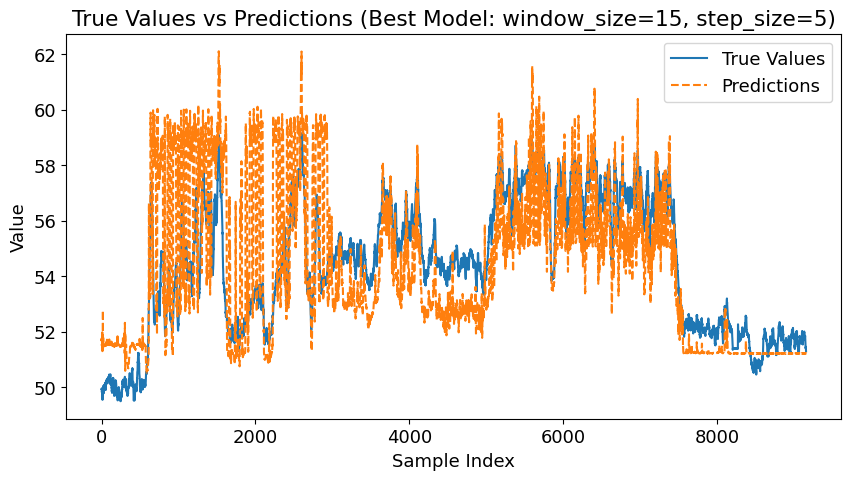

In [15]:
from sklearn.metrics import r2_score



from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import os

import torch
import numpy as np
from datetime import datetime

def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)


# 가중치 초기화 고정

np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# GAT-LSTM 모델 학습 및 평가
def train_and_evaluate(window_sizes, step_sizes, num_epochs=1, save_dir='./results'):
    best_r2_score = -np.inf
    best_window_size = None
    best_step_size = None
    best_predictions = None
    best_true_values = None
    
    # 결과를 저장할 디렉토리 생성
    current_datetime = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # 결과를 저장할 디렉토리 경로에 날짜와 시간 추가
    save_dir_with_date = f"{save_dir}_{current_datetime}"
    
    # 결과를 저장할 디렉토리 생성
    os.makedirs(save_dir_with_date, exist_ok=True)
    
    # 디렉토리 경로 출력 (디버깅 용도)
    print(f"Results will be saved in: {save_dir_with_date}")

    # 공통적으로 사용될 설정
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    heads = 2  # GAT의 attention head 수
    lstm_hidden_size = 64  # LSTM의 숨겨진 상태 크기
    lstm_num_layers = 1  # LSTM 레이어 수
    dropout_rate = 0.3  # 드롭아웃 확률
    loss_func = torch.nn.MSELoss()

    for window_size in window_sizes:
        for step_size in step_sizes:
            torch.manual_seed(42)
            edge_index = node_select(node_num=31)
            print(f"Training with window_size={window_size}, step_size={step_size}")

            # 슬라이딩 윈도우 생성
            train_window, y_window = sliding_window(node_feature_tensor_train.t(), target_col, window_size, step_size)
            train_graph = [Data(x=train_window[i], y=y_window[i], edge_index=edge_index) for i in range(len(train_window))]

            # 데이터셋 생성
            dataset = MyDataset(train_graph)

            # 데이터셋을 8:2 비율로 train과 validation으로 나눔
            train_size = int(0.8 * len(dataset))
            train_indices = list(range(train_size))
            val_indices = list(range(train_size, len(dataset)))
            train_dataset = dataset.index_select(train_indices)
            val_dataset = dataset.index_select(val_indices)

            # DataLoader 생성
            train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
            val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

            # in_channels와 out_channels를 window_size로 설정
            in_channels = window_size
            out_channels = window_size

            # 모델 생성
            model = GAT_LSTM(in_channels, out_channels, lstm_hidden_size, lstm_num_layers, heads, dropout_rate).to(device)
            
            # 옵티마이저와 스케줄러 초기화
            optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
            
            # 모델 학습
            for epoch in range(num_epochs):
                model.train()
                train_loss = 0
                for batch in train_loader:
                    x_batch, y_batch = batch.x.to(device), batch.y.to(device)
                    edge_index = batch.edge_index.to(device)
                    batch_info = batch.batch.to(device)
                    optimizer.zero_grad()
                    predictions = model(x_batch, edge_index, batch_info)
                    loss = loss_func(predictions, y_batch.float())
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item()
                train_loss /= len(train_loader)

                # 모델 검증
                model.eval()
                val_loss = 0
                with torch.no_grad():
                    for batch in val_loader:
                        x_batch, y_batch = batch.x.to(device), batch.y.to(device)
                        edge_index = batch.edge_index.to(device)
                        batch_info = batch.batch.to(device)
                        predictions = model(x_batch, edge_index, batch_info)
                        loss = loss_func(predictions, y_batch.float())
                        val_loss += loss.item()
                val_loss /= len(val_loader)
                
                
                # 현재 에포크와 남은 에포크 출력
                print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

            # 테스트 데이터로 R^2 스코어 계산
            model.eval()
            edge_index = node_select(node_num=31)
            test_window, test_y_window = sliding_window(test_node_feature_tensor.t(), test_target_tensor, window_size, step_size)
            test_graph = [Data(x=test_window[i], y=test_y_window[i], edge_index=edge_index) for i in range(len(test_window))]
            test_loader = DataLoader(test_graph, batch_size=32, shuffle=False)

            y_true = []
            y_pred = []
            with torch.no_grad():
                for batch in test_loader:
                    x_batch, y_batch = batch.x.to(device), batch.y.to(device)
                    batch_info = batch.batch.to(device)
                    edge_index = batch.edge_index.to(device)
                    predictions = model(x_batch, edge_index, batch_info)
                    y_true.extend(y_batch.cpu().numpy())
                    y_pred.extend(predictions.cpu().numpy())

            r2 = r2_score(y_true, y_pred)
            mape = mean_absolute_percentage_error(y_true, y_pred)
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))

            print(f"R^2 Score: {r2:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

            print(f"R^2 Score: {r2:.4f}")

            # 최상의 R^2 스코어 업데이트
            if r2 > best_r2_score:
                best_r2_score = r2
                best_window_size = window_size
                best_step_size = step_size
                best_predictions = y_pred
                best_true_values = y_true

            # 그래프 저장
            # 폰트 사이즈 설정
            plt.rcParams.update({'font.size': 13})        

            # 예측값과 실제값 비교 플로팅
            plt.figure(figsize=(10, 5))
            plt.plot(y_true, label='Actual')
            plt.plot(y_pred, label='Predicted')
            plt.xlabel('Time (sec)')
            plt.ylabel('NOx ppm')
            plt.grid(True)  # 격자 추가
            plt.legend()
            # plt.show()
            # 파일 경로 및 이름 설정
            # 파일 경로 및 이름 설정
            file_name = f"results_window_{window_size}_step_{step_size}_r2_{r2:.4f}_mape_{mape:.4f}_rmse_{rmse:.4f}.png"
            file_path = os.path.join(save_dir_with_date, file_name)
            plt.savefig(file_path)
            plt.close()
            clear_memory()

    print(f"Best R^2 Score: {best_r2_score:.4f} with window_size={best_window_size}, step_size={best_step_size}")

    # 최적의 모델로 예측값과 실제값 플로팅 및 저장
    plt.figure(figsize=(10, 5))
    plt.plot(best_true_values, label="True Values")
    plt.plot(best_predictions, label="Predictions", linestyle='--')
    plt.title(f"True Values vs Predictions (Best Model: window_size={best_window_size}, step_size={best_step_size})")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    best_file_name = f"best_results_window_{best_window_size}_step_{best_step_size}.png"
    best_file_path = os.path.join(save_dir_with_date, best_file_name)
    plt.savefig(best_file_path)
    plt.show()

# 윈도우 사이즈와 스텝 사이즈의 조합 설정
window_sizes = [10, 15, 20 , 25,30,35,40]
step_sizes = [ 1,5,10]

# 함수 실행
train_and_evaluate(window_sizes, step_sizes, num_epochs=200)

